## Artículos Interesantes

Veamos acá cómo está distribuido el odio según las notas

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import django
from tqdm.auto import tqdm

os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

sys.path.append("..")
os.environ['DJANGO_SETTINGS_MODULE'] = 'news_labelling.settings'
django.setup()

from api.models import Comment, ArticleLabel, CommentLabel, Article, Batch
from django.contrib.auth.models import User

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Histograma de #comentarios odiosos por artículo')

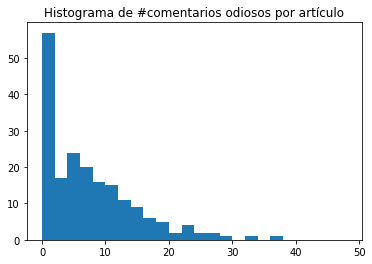

In [21]:
from matplotlib import pyplot as plt

hist = []
users = ["asilva", "dvalado", "gclerici", "gdamill", "lprats", ]

article_labels = ArticleLabel.objects.prefetch_related('comment_labels').filter(
    user__username__in=users,
    
).exclude(
    article__batch__name="training"
)

label_stats = {
    
}

for article_label in article_labels:
    hateful_comments = sum([c.is_hateful for c in article_label.comment_labels.all()])
    label_stats[article_label] = hateful_comments
    
plt.hist(label_stats.values(), bins=range(0, 50, 2), range=[0, 50])
plt.title("Histograma de #comentarios odiosos por artículo")

Y si vemos el máximo por cada artículo?

Text(0.5, 1.0, 'Histograma de #comentarios odiosos por artículo (máximo por etiquetador)')

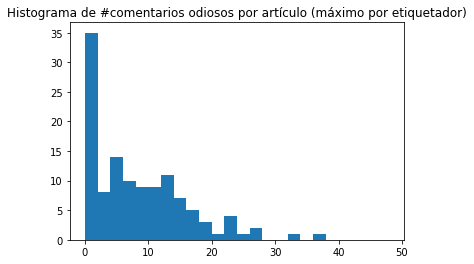

In [23]:
article_stats = {
    
}
for article_label in article_labels:
    article = article_label.article
    hateful_comments = sum([c.is_hateful for c in article_label.comment_labels.all()])
    
    article_stats[article] = max(
        article_stats.get(article, 0),
        hateful_comments,
    )

plt.hist(article_stats.values(), bins=range(0, 50, 2), range=[0, 50])
plt.title("Histograma de #comentarios odiosos por artículo (máximo por etiquetador)")

In [53]:
not_so_terrible = [article for article, hateful_comments in article_stats.items() if 3< hateful_comments <= 5]

not_so_terrible = sorted(not_so_terrible, key=lambda x: article_stats[x])
print(len(not_so_terrible))

for article in not_so_terrible:
    print("="*80)
    print(article.title, "\n")
    hateful_labels = CommentLabel.objects.filter(
        comment__article=article,
        article_label__user__username__in=users,
        is_hateful=True
    )


    for label in hateful_labels:
        print(label, end="\n\n")


14
Coronavirus: la OMS viaja a China y empieza a estudiar la nueva gripe porcina 

asilva sobre '@usuario Confirmado los chinos son culpables de todos los males. por favor aislenlos del mundo en forma inmediata.'
Odioso y violento  -> ['RACISMO']

dvalado sobre '@usuario Confirmado los chinos son culpables de todos los males. por favor aislenlos del mundo en forma inmediata.'
Odioso y violento  -> ['RACISMO']

dvalado sobre '@usuario son TODOS UNOS HIJOS DE PUTA, TANTO CHINOS, ONU Y OMS. POR LA MATANZA DE BILLONES DE ANIMALES'
Odioso  -> ['RACISMO']

dvalado sobre '@usuario Me parece q NU y la OMS ya tendrían q ocuparse seriamente de China. Es un territorio inmenso con 1400 millones de personas q propagan cualquier cosa en días. Con unas costumbres alimenticias q demostraron ser peligrosísimas. No somos mejores pero parece que ahí hay un plus.'
Odioso  -> ['RACISMO']

asilva sobre '@usuario Manden a los chinos a marte'
Odioso y violento  -> ['RACISMO']

dvalado sobre '@usuario Manden a